In [5]:
import pandas as pd
import numpy as np
import requests
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

def get_all_categories(df1, df2, categorical_columns):
    all_categories = {}
    for column in categorical_columns:
        all_categories[column] = sorted(set(df1[column].unique()) | set(df2[column].unique()))
    return all_categories

def get_dataset(df, all_categories):
    df.replace("?", np.nan, inplace=True)
    df.dropna(inplace=True)
    df['income'] = df['income'].map({'>50K': 1, '<=50K': 0, '>50K.': 1, '<=50K.': 0})
    for column in all_categories:
        df[column] = pd.Categorical(df[column], categories=all_categories[column])
    df = pd.get_dummies(df, columns=list(all_categories.keys()))
    return df

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


# Read and clean the adult.data
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df_train_raw = pd.read_csv(data_url, header=None, names=column_names, delimiter=', ', engine='python')

#Printing discriptive statistics to see about the dataset
df_train_raw.info()

# Read and clean the adult.test
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
df_test_raw = pd.read_csv(test_url, header=None, names=column_names, delimiter=', ', engine='python', skiprows=1)

categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
all_categories = get_all_categories(df_train_raw, df_test_raw, categorical_columns)

df_train = get_dataset(df_train_raw, all_categories)
df_test = get_dataset(df_test_raw, all_categories)

# Separate the features (X) and the target (y) in both datasets
X_train = df_train.drop('income', axis=1)
y_train = df_train['income']
X_test = df_test.drop('income', axis=1)
y_test = df_test['income']

# Train and evaluate Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# Train and evaluate Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Train and evaluate K-Nearest Neighbors Classifier model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors Classifier Model")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Logistic Regression Model
Accuracy: 0.7926958831341302
              precision    recall  f1-

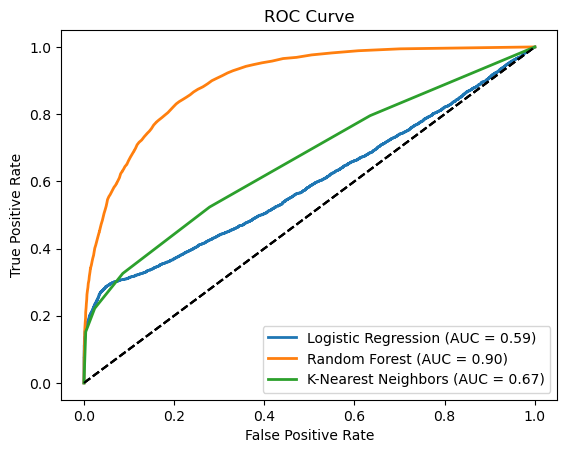

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

# Compute ROC curve and ROC AUC for Logistic Regression
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Compute ROC curve and ROC AUC for Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Compute ROC curve and ROC AUC for K-Nearest Neighbors
knn_probs = knn_model.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

# Plot ROC curves
plot_roc_curve(lr_fpr, lr_tpr, f'Logistic Regression (AUC = {lr_auc:.2f})')
plot_roc_curve(rf_fpr, rf_tpr, f'Random Forest (AUC = {rf_auc:.2f})')
plot_roc_curve(knn_fpr, knn_tpr, f'K-Nearest Neighbors (AUC = {knn_auc:.2f})')
plt.legend(loc='lower right')
plt.show()


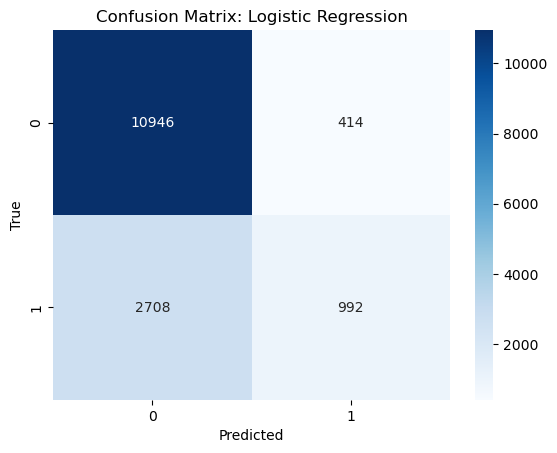

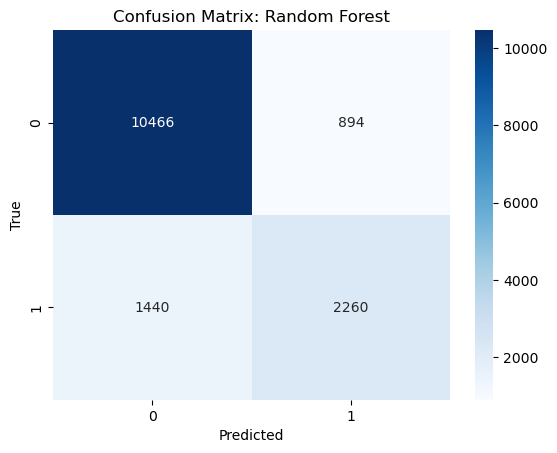

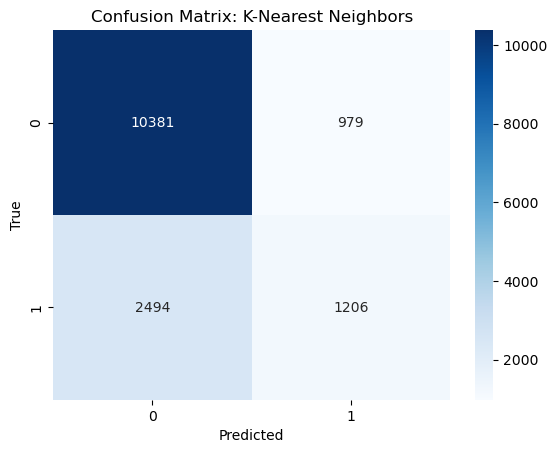

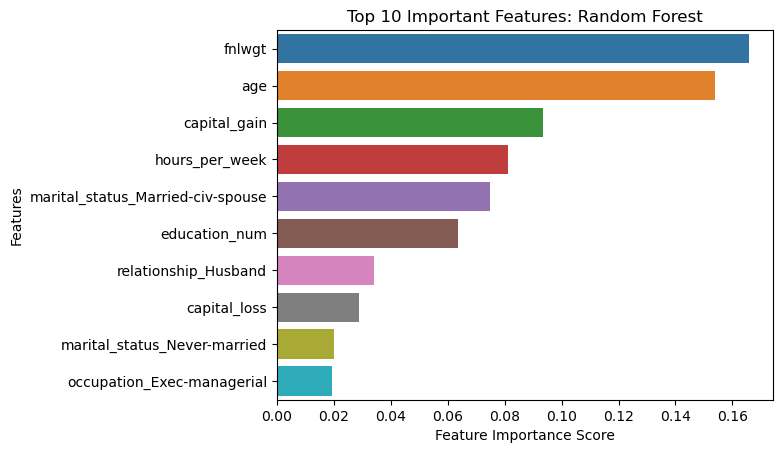

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

def plot_important_features(importance, columns, model_name, top_n=10):
    feature_importance = pd.Series(importance, index=columns).sort_values(ascending=False)
    important_features = feature_importance[:top_n]
    sns.barplot(x=important_features, y=important_features.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(f'Top {top_n} Important Features: {model_name}')
    plt.show()

#Plot confusion matrices

plot_confusion_matrix(y_test, lr_pred, "Logistic Regression")
plot_confusion_matrix(y_test, rf_pred, "Random Forest")
plot_confusion_matrix(y_test, knn_pred, "K-Nearest Neighbors")

#Plot feature importance for Random Forest model

plot_important_features(rf_model.feature_importances_, X_train.columns, "Random Forest", top_n=10)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


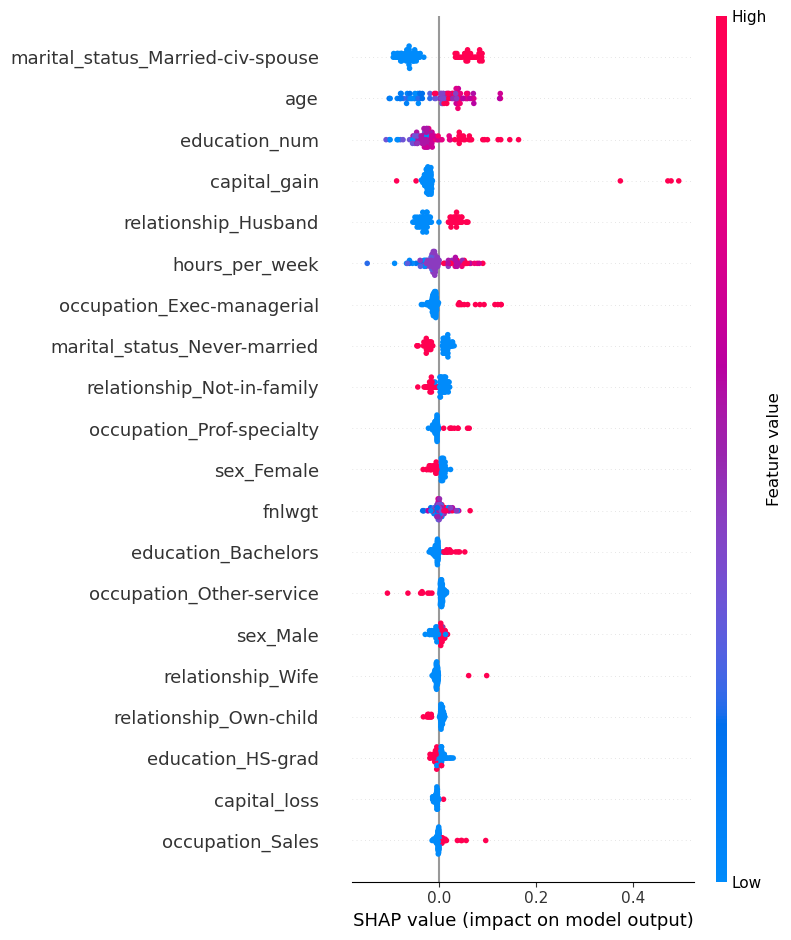

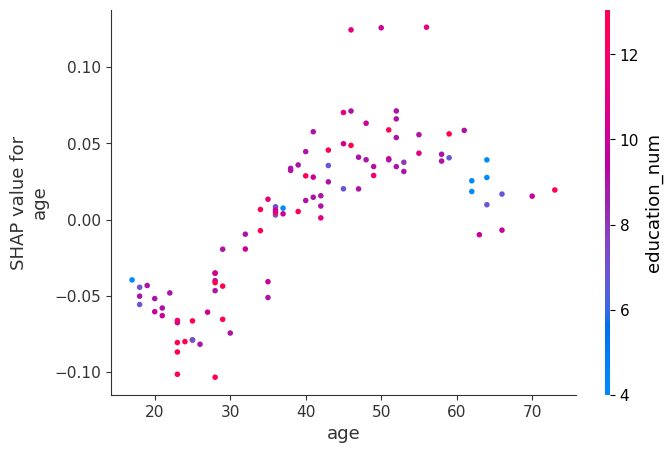

In [4]:
import shap

# Use TreeExplainer for tree-based models like RandomForest, GradientBoosting, and XGBoost
explainer = shap.TreeExplainer(rf_model)

# For other models like Logistic Regression or SVM, use KernelExplainer
# explainer = shap.KernelExplainer(rf_model.predict_proba, X_train)

sample = X_test.sample(100, random_state=42)
shap_values = explainer.shap_values(sample)

# Select an instance (e.g., the first one in the sample)
instance_index = 0

# Plot SHAP values for the selected instance
shap.force_plot(explainer.expected_value[1], shap_values[1][instance_index, :], sample.iloc[instance_index, :], feature_names=sample.columns)

shap.summary_plot(shap_values[1], sample, feature_names=sample.columns)

#The summary plot shows the contribution of each feature towards the prediction for each instance in the sampled test set. The x-axis represents the SHAP values, while the y-axis contains the features sorted by their overall importance.

# Create a SHAP dependence plot for the 'age' feature
feature_name = 'age'
feature_index = sample.columns.get_loc(feature_name)
shap.dependence_plot(feature_index, shap_values[1], sample, feature_names=sample.columns)

#The SHAP dependence plot shows the relationship between the SHAP values (y-axis) and the chosen feature's values (x-axis). Each point represents an instance in the dataset, and the color scale indicates the value of another feature with which the chosen feature interacts the most.

#This plot can help you understand how the chosen feature's values affect the prediction and how this effect changes when considering the interaction with other features.